In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import  GridSearchCV
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
from sklearn.inspection import DecisionBoundaryDisplay

In [33]:
data = load_digits()
X = data.data
y = data.target

In [34]:
np.unique(y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180], dtype=int64))

In [35]:
X.shape

(1797, 64)

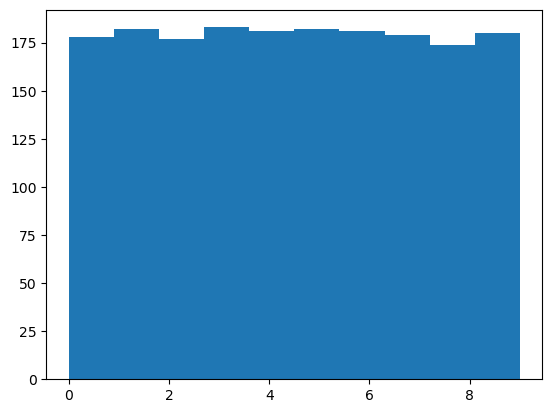

<Figure size 2000x2000 with 0 Axes>

In [36]:
plt.hist(y)
plt.figure(figsize = (20,20));

In [37]:
features_data = pd.DataFrame(X)
features_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [38]:
features_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1797 non-null   float64
 1   1       1797 non-null   float64
 2   2       1797 non-null   float64
 3   3       1797 non-null   float64
 4   4       1797 non-null   float64
 5   5       1797 non-null   float64
 6   6       1797 non-null   float64
 7   7       1797 non-null   float64
 8   8       1797 non-null   float64
 9   9       1797 non-null   float64
 10  10      1797 non-null   float64
 11  11      1797 non-null   float64
 12  12      1797 non-null   float64
 13  13      1797 non-null   float64
 14  14      1797 non-null   float64
 15  15      1797 non-null   float64
 16  16      1797 non-null   float64
 17  17      1797 non-null   float64
 18  18      1797 non-null   float64
 19  19      1797 non-null   float64
 20  20      1797 non-null   float64
 21  21      1797 non-null   float64
 22  

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3)

In [40]:
model_DT = DecisionTreeClassifier()
optimal_model_DT = GridSearchCV(model_DT, param_grid = {"min_samples_leaf":np.arange(2,10,1), "criterion": ['gini', 'entropy'], "splitter": ["best", "random"]}, cv = 5)
optimal_model_DT.fit(X_train,y_train)
print("DT Train Score " , optimal_model_DT.score(X_train,y_train))
print("DT Test Score " , optimal_model_DT.score(X_test,y_test))
print("DT Parameter List ", np.arange(2,15,1))
print("DT CV Score List " , np.round(optimal_model_DT.cv_results_['mean_test_score'],3))
print("DT Best CV Score " , optimal_model_DT.best_score_)
print("DT Optimal Parameter " , optimal_model_DT.best_params_)

DT Train Score  0.9713603818615751
DT Test Score  0.8814814814814815
DT Parameter List  [ 2  3  4  5  6  7  8  9 10 11 12 13 14]
DT CV Score List  [0.824 0.814 0.815 0.8   0.815 0.817 0.811 0.803 0.817 0.801 0.809 0.796
 0.811 0.769 0.804 0.769 0.835 0.833 0.827 0.826 0.823 0.796 0.819 0.822
 0.812 0.807 0.81  0.77  0.804 0.776 0.804 0.762]
DT Best CV Score  0.8353063934737242
DT Optimal Parameter  {'criterion': 'entropy', 'min_samples_leaf': 2, 'splitter': 'best'}


In [41]:
y_predict_test = optimal_model_DT.predict(X_test)

print("Classification Report")
print(classification_report(y_test, y_predict_test))

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.94      0.93        53
           1       0.92      0.92      0.92        50
           2       0.84      0.91      0.88        47
           3       0.82      0.91      0.86        54
           4       0.85      0.78      0.82        60
           5       0.94      0.88      0.91        66
           6       0.96      0.96      0.96        53
           7       0.83      0.89      0.86        55
           8       0.86      0.84      0.85        43
           9       0.89      0.80      0.84        59

    accuracy                           0.88       540
   macro avg       0.88      0.88      0.88       540
weighted avg       0.88      0.88      0.88       540



In [42]:
pd.DataFrame(y_predict_test).value_counts()

5    62
3    60
7    59
0    55
4    55
6    53
9    53
2    51
1    50
8    42
dtype: int64

In [43]:
pd.DataFrame(y_test).value_counts()

5    66
4    60
9    59
7    55
3    54
0    53
6    53
1    50
2    47
8    43
dtype: int64

In [44]:
final_DT = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = 2, splitter = 'best')
final_DT.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2)

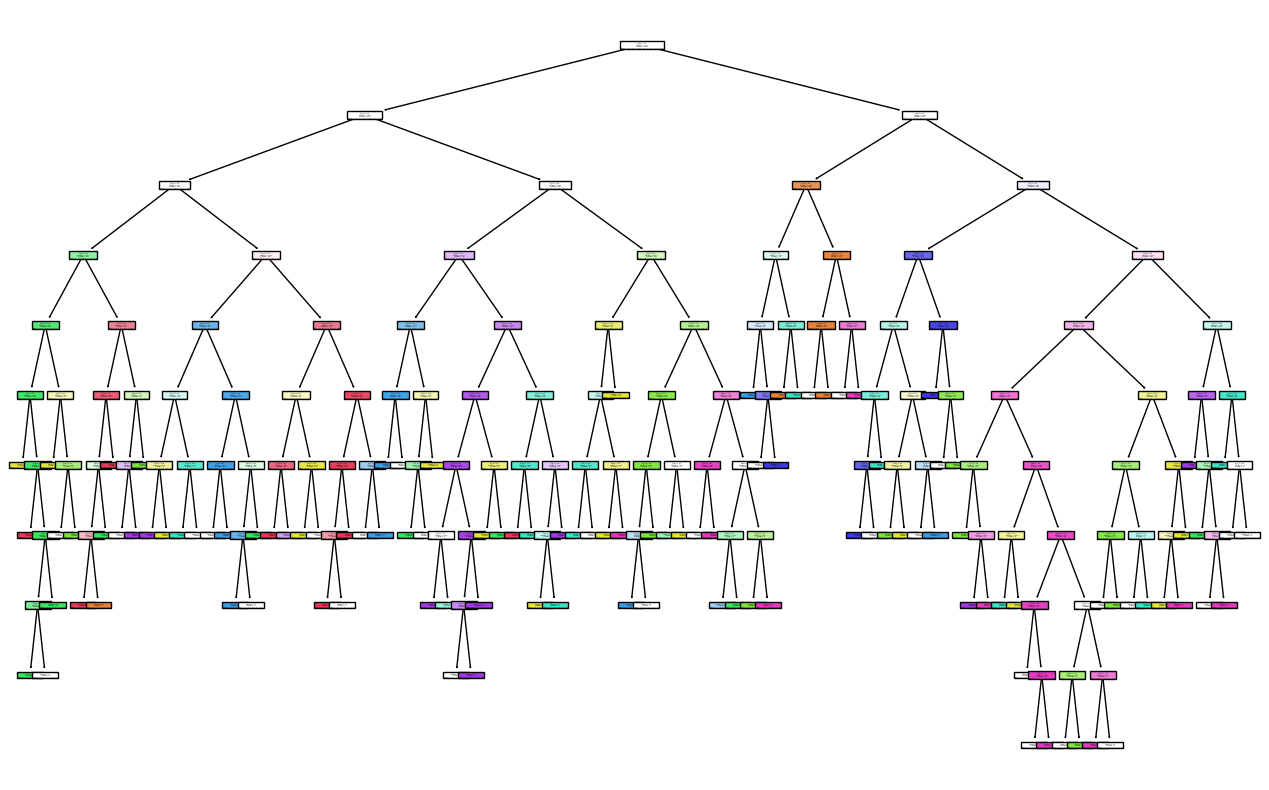

In [45]:
plt.figure(figsize = (16,10))
plot_tree(final_DT, filled = True, node_ids = True)
plt.show()

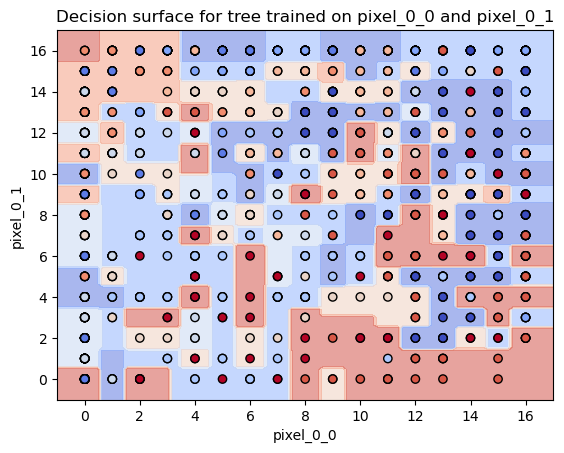

In [46]:
X_train_cols = X_train[:, 50:52] 
classifier = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = 2, splitter = 'best').fit(X_train_cols, y_train)
disp = DecisionBoundaryDisplay.from_estimator(classifier, 
                                              X_train_cols, 
                                              response_method="predict",
                                              xlabel=data.feature_names[0], ylabel=data.feature_names[1],
                                              alpha=0.5, 
                                              cmap=plt.cm.coolwarm)

# Plotting the data points    
disp.ax_.scatter(X_train[:, 50], X_train[:, 51], 
                 c=y_train, edgecolor="k",
                 cmap=plt.cm.coolwarm)

plt.title(f"Decision surface for tree trained on {data.feature_names[0]} and {data.feature_names[1]}")
plt.show()

## Random Forest

In [47]:
model_RF = RandomForestClassifier()
optimal_model_RF = GridSearchCV(model_RF, param_grid = {"n_estimators": np.arange(2,10,1), "min_samples_leaf":np.arange(2,10,1), "criterion": ['gini', 'entropy'], "max_leaf_nodes": np.arange(2,10,1)}, cv = 5)
optimal_model_RF.fit(X_train,y_train)
print("RF Train Score " , optimal_model_RF.score(X_train,y_train))
print("RF Test Score " , optimal_model_RF.score(X_test,y_test))
print("RF CV Score List " , np.round(optimal_model_RF.cv_results_['mean_test_score'],3))
print("RF Best CV Score " , optimal_model_RF.best_score_)
print("RF Optimal Parameter " , optimal_model_RF.best_params_)

RF Train Score  0.8536197295147175
RF Test Score  0.8722222222222222
RF CV Score List  [0.263 0.32  0.368 ... 0.788 0.796 0.8  ]
RF Best CV Score  0.8321602478972997
RF Optimal Parameter  {'criterion': 'entropy', 'max_leaf_nodes': 9, 'min_samples_leaf': 3, 'n_estimators': 9}


In [48]:
y_predict_RF = optimal_model_RF.predict(X_test)

print("Classification Report")
print(classification_report(y_test, y_predict_RF))

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.96      0.93        53
           1       0.87      0.78      0.82        50
           2       0.89      0.87      0.88        47
           3       0.82      0.91      0.86        54
           4       0.85      0.95      0.90        60
           5       0.95      0.83      0.89        66
           6       0.96      0.98      0.97        53
           7       0.83      0.91      0.87        55
           8       0.82      0.74      0.78        43
           9       0.83      0.76      0.80        59

    accuracy                           0.87       540
   macro avg       0.87      0.87      0.87       540
weighted avg       0.87      0.87      0.87       540



## Simple Bagging

In [49]:
model_BC = BaggingClassifier()
optimal_model_BC = GridSearchCV(model_BC, param_grid = {"n_estimators": np.arange(2,10,1), "max_samples":np.arange(2,10,1),  "max_features": np.arange(2,10,1)}, cv = 5)
optimal_model_BC.fit(X_train,y_train)
print("BC Train Score " , optimal_model_BC.score(X_train,y_train))
print("BC Test Score " , optimal_model_BC.score(X_test,y_test))
print("BC CV Score List " , np.round(optimal_model_BC.cv_results_['mean_test_score'],3))
print("BC Best CV Score " , optimal_model_BC.best_score_)
print("BC Optimal Parameter " , optimal_model_BC.best_params_)

BC Train Score  0.345266507557677
BC Test Score  0.32592592592592595
BC CV Score List  [0.117 0.138 0.138 0.109 0.15  0.144 0.117 0.102 0.134 0.148 0.169 0.15
 0.142 0.151 0.182 0.151 0.14  0.151 0.181 0.154 0.181 0.155 0.198 0.207
 0.131 0.156 0.154 0.181 0.208 0.204 0.202 0.217 0.153 0.177 0.2   0.186
 0.235 0.195 0.251 0.212 0.157 0.197 0.262 0.204 0.249 0.245 0.235 0.241
 0.168 0.193 0.179 0.184 0.215 0.254 0.231 0.207 0.187 0.203 0.23  0.25
 0.208 0.239 0.223 0.228 0.127 0.154 0.121 0.143 0.106 0.165 0.129 0.152
 0.148 0.12  0.178 0.154 0.18  0.158 0.161 0.148 0.131 0.141 0.165 0.19
 0.168 0.175 0.224 0.224 0.121 0.148 0.197 0.21  0.173 0.154 0.225 0.242
 0.195 0.202 0.192 0.207 0.246 0.282 0.255 0.236 0.168 0.165 0.236 0.225
 0.233 0.236 0.28  0.246 0.212 0.258 0.15  0.259 0.234 0.262 0.304 0.29
 0.18  0.18  0.234 0.237 0.277 0.258 0.345 0.292 0.131 0.126 0.14  0.119
 0.142 0.15  0.156 0.151 0.129 0.157 0.187 0.148 0.171 0.205 0.176 0.19
 0.158 0.186 0.192 0.201 0.207 0.214 0.228

In [50]:
y_predict_BC = optimal_model_BC.predict(X_test)

print("Classification Report")
print(classification_report(y_test, y_predict_BC))

Classification Report
              precision    recall  f1-score   support

           0       0.21      0.15      0.17        53
           1       0.16      0.06      0.09        50
           2       0.34      0.49      0.40        47
           3       0.29      0.65      0.40        54
           4       0.28      0.68      0.40        60
           5       0.00      0.00      0.00        66
           6       0.44      0.08      0.13        53
           7       0.42      0.62      0.50        55
           8       0.34      0.35      0.34        43
           9       0.87      0.22      0.35        59

    accuracy                           0.33       540
   macro avg       0.34      0.33      0.28       540
weighted avg       0.33      0.33      0.27       540



## Boosting algorithm

In [51]:
model_GB = GradientBoostingClassifier()
optimal_model_GB = GridSearchCV(model_GB, param_grid = {"loss" : ["log_loss","exponential"], "n_estimators": np.arange(2,10,1), "learning_rate":np.arange(0.01, 1, 0.1), "criterion" : ["friedman_mse", "squared_error"], "min_samples_leaf":np.arange(2,10,1) }, cv = 5)
optimal_model_GB.fit(X_train,y_train)
print("GB Train Score " , optimal_model_GB.score(X_train,y_train))
print("GB Test Score " , optimal_model_GB.score(X_test,y_test))
print("GB CV Score List " , np.round(optimal_model_GB.cv_results_['mean_test_score'],3))
print("GB Best CV Score " , optimal_model_GB.best_score_)
print("GB Optimal Parameter " , optimal_model_GB.best_params_)

GB Train Score  1.0
GB Test Score  0.9462962962962963
GB CV Score List  [0.753 0.78  0.793 ...   nan   nan   nan]
GB Best CV Score  0.9204799848226143
GB Optimal Parameter  {'criterion': 'friedman_mse', 'learning_rate': 0.6100000000000001, 'loss': 'log_loss', 'min_samples_leaf': 9, 'n_estimators': 9}


In [52]:
y_predict_GB = optimal_model_GB.predict(X_test)

print("Classification Report")
print(classification_report(y_test, y_predict_GB))

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        53
           1       0.98      0.94      0.96        50
           2       0.92      0.96      0.94        47
           3       0.98      0.91      0.94        54
           4       1.00      0.98      0.99        60
           5       0.97      0.94      0.95        66
           6       0.96      0.96      0.96        53
           7       0.92      0.98      0.95        55
           8       0.83      1.00      0.91        43
           9       0.94      0.85      0.89        59

    accuracy                           0.95       540
   macro avg       0.95      0.95      0.95       540
weighted avg       0.95      0.95      0.95       540



# **The overall accuracy is equal to**

## $\frac{True Positive + True Negative}{True Positive + False Negative + False Positive + True Negative}$

**The accuracy shows what percent of the predictions of the model are correct.**


# Recall which is also called Sensitivity is equal to

## $\frac{True Positive}{True Positive + False Negative}$

**Recall shows what percent of actual specific class is actually predicted to be that specific class.**




# **Precision which is also called Positive Predicted Value is equal to**

## $\frac{True Positive}{True Positive+ False Positive}$

**Precision shows what percent of the predicted specific class is  actually that certain class.**




**Usually, accuracy is not selected as an evaluation metric as it depends on  cut-off value and does not differentiate between Sensitivity and Specificity.**



**F1-score is the harmonic mean of precision and recall and by maximizing F1-score we maximize both precision and recall simultaneously. Hence, for the models' comparison F1-score metric is chosen**

**Based on the models' F1-score results the best model is boostng algorithm. The model that has the lowest scores is bagging algorithm. Additionally, when I compare Decistion tree algorithm with Random forest algorithm, Decision tree has slightly higher scores than Random forest. The reason why Boosting works better is that Boosting algorithm combines multiple weak learners in a sequential method, which iteratively improves observations. This approach helps to reduce high bias**